,Unnamed: 0,z0_primavera,z0_verão,z0_outono,z0_inverno,alb_primavera,alb_verão,alb_outono,alb_inverno,bo_primavera,bo_verão,bo_outono,bo_inverno,Sectores
0,0,0.682931,0.696549,0.666509,0.666509,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,90
1,1,0.847253,0.855292,0.840821,0.840821,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,135
2,2,0.852430,0.860028,0.846351,0.846351,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,180
3,3,0.822493,0.831259,0.815480,0.815480,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,225
4,4,0.863255,0.870452,0.857498,0.857498,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,270
5,5,0.795671,0.802883,0.785688,0.785688,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,315
6,6,0.789986,0.798923,0.777733,0.777733,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,45
7,7,0.731398,0.742765,0.722303,0.722303,0.14305,0.149046,0.168622,0.168622,0.285325,0.538157,0.65055,0.65055,0


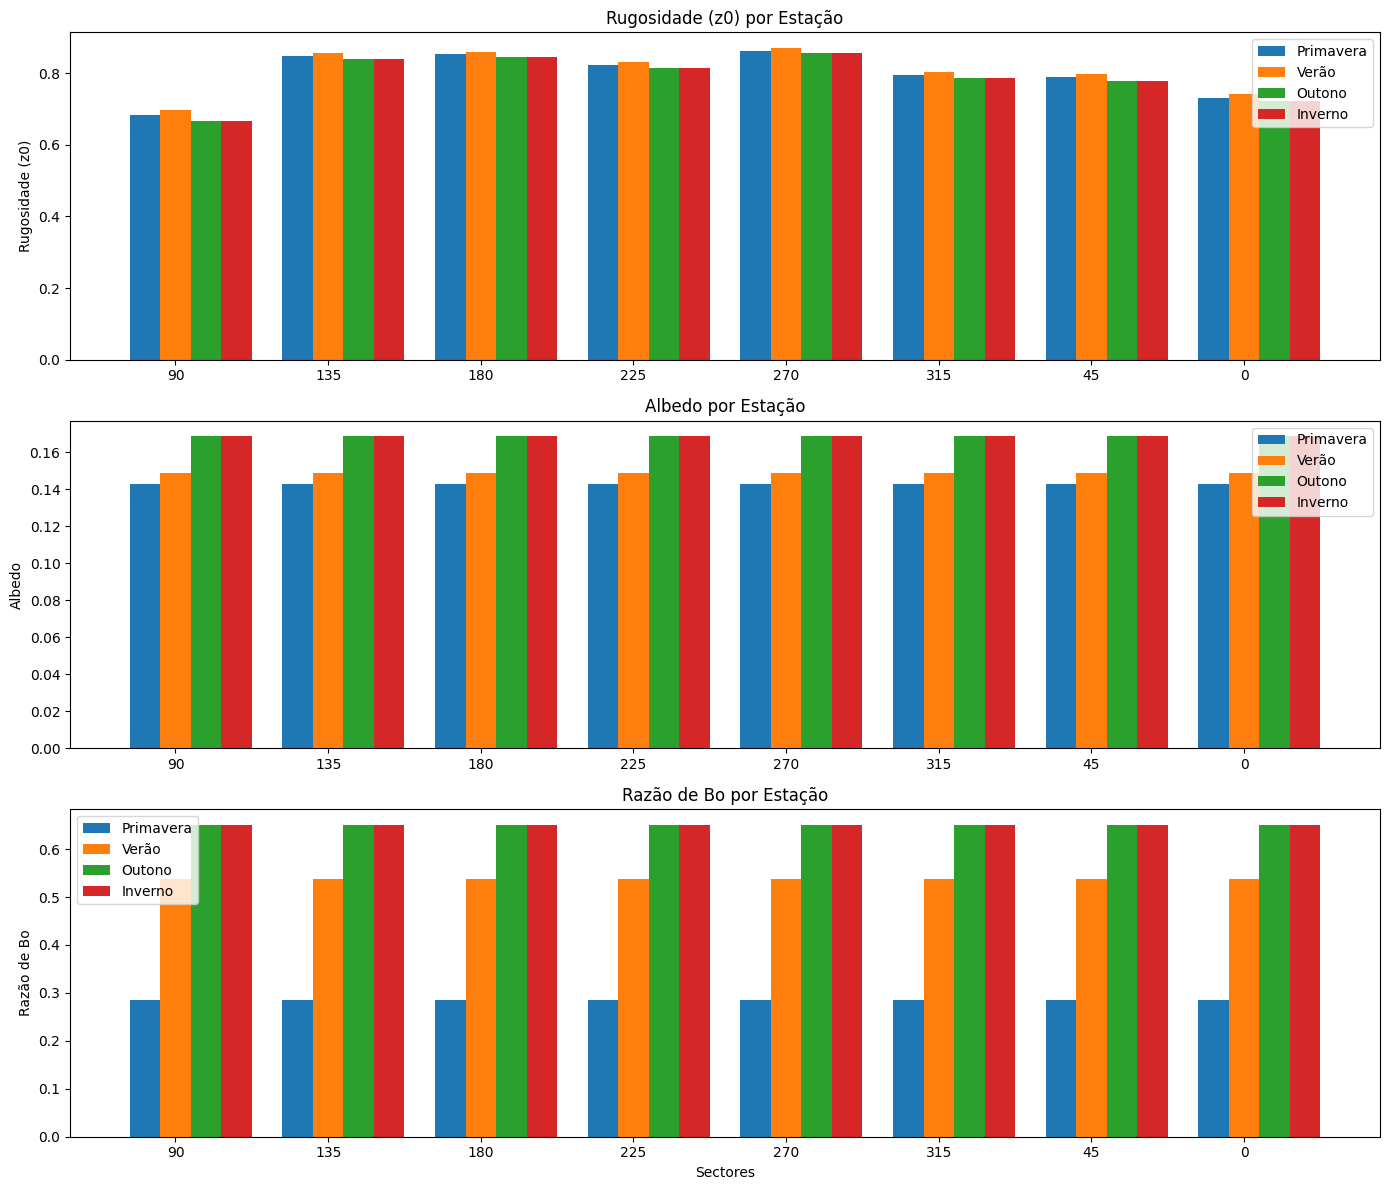

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho para o arquivo CSV
caminho_arquivo = r'C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\inputs\ez_aermod_marilia\landUseCharportobello.csv'

# Abrir o arquivo CSV como um DataFrame do pandas, especificando o encoding
df = pd.read_csv(caminho_arquivo, encoding='latin1')

# Configurações para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Exibir DataFrame
display(df)

# Plotar os gráficos
plt.figure(figsize=(14, 12))

# Plot para rugosidade (z0)
plt.subplot(3, 1, 1)
bar_width = 0.2
sectors = df['Sectores']
indices = range(len(sectors))
plt.bar([i - bar_width for i in indices], df['z0_primavera'], width=bar_width, label='Primavera')
plt.bar(indices, df['z0_verão'], width=bar_width, label='Verão')
plt.bar([i + bar_width for i in indices], df['z0_outono'], width=bar_width, label='Outono')
plt.bar([i + 2 * bar_width for i in indices], df['z0_inverno'], width=bar_width, label='Inverno')
plt.xticks(indices, sectors)  # Garantir que os setores sejam exatamente os da tabela
plt.ylabel('Rugosidade (z0)')
plt.title('Rugosidade (z0) por Estação')
plt.legend()

# Plot para albedo
plt.subplot(3, 1, 2)
plt.bar([i - bar_width for i in indices], df['alb_primavera'], width=bar_width, label='Primavera')
plt.bar(indices, df['alb_verão'], width=bar_width, label='Verão')
plt.bar([i + bar_width for i in indices], df['alb_outono'], width=bar_width, label='Outono')
plt.bar([i + 2 * bar_width for i in indices], df['alb_inverno'], width=bar_width, label='Inverno')
plt.xticks(indices, sectors)  # Garantir que os setores sejam exatamente os da tabela
plt.ylabel('Albedo')
plt.title('Albedo por Estação')
plt.legend()

# Plot para razão de bo
plt.subplot(3, 1, 3)
plt.bar([i - bar_width for i in indices], df['bo_primavera'], width=bar_width, label='Primavera')
plt.bar(indices, df['bo_verão'], width=bar_width, label='Verão')
plt.bar([i + bar_width for i in indices], df['bo_outono'], width=bar_width, label='Outono')
plt.bar([i + 2 * bar_width for i in indices], df['bo_inverno'], width=bar_width, label='Inverno')
plt.xticks(indices, sectors)  # Garantir que os setores sejam exatamente os da tabela
plt.ylabel('Razão de Bo')
plt.xlabel('Sectores')
plt.title('Razão de Bo por Estação')
plt.legend()

# Ajustar layout
plt.tight_layout()
plt.show()


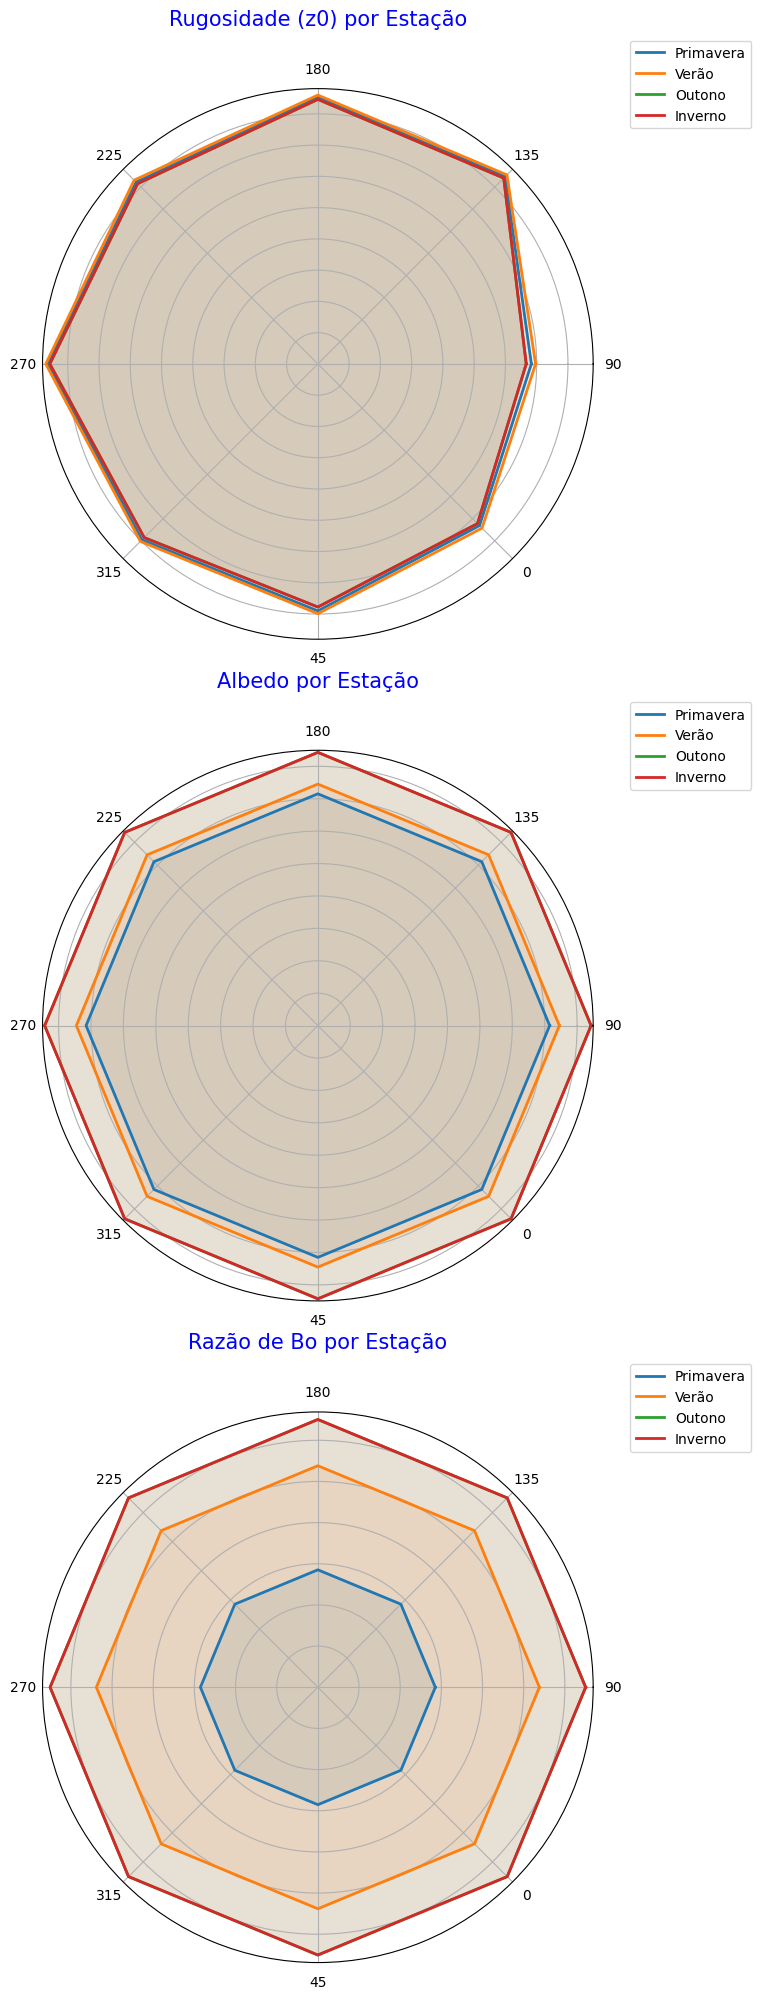

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Caminho para o arquivo CSV
caminho_arquivo = r'C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\inputs\ez_aermod_marilia\landUseCharportobello.csv'

# Abrir o arquivo CSV como um DataFrame do pandas, especificando o encoding
df = pd.read_csv(caminho_arquivo, encoding='latin1')

# Configurações para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Função para criar um gráfico de radar
def plot_radar(ax, categories, values_dict, title):
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title, size=15, color='blue', y=1.1)
    
    for label, values in values_dict.items():
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=label)
        ax.fill(angles, values, alpha=0.1)
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Categorias (Sectores)
categories = df['Sectores'].astype(str).tolist()

# Criação da figura e eixos
fig, axs = plt.subplots(3, 1, figsize=(10, 20), subplot_kw=dict(polar=True))

# Dados para rugosidade (z0)
rugosidade_values = {
    'Primavera': df['z0_primavera'].tolist(),
    'Verão': df['z0_verão'].tolist(),
    'Outono': df['z0_outono'].tolist(),
    'Inverno': df['z0_inverno'].tolist()
}

# Dados para albedo
albedo_values = {
    'Primavera': df['alb_primavera'].tolist(),
    'Verão': df['alb_verão'].tolist(),
    'Outono': df['alb_outono'].tolist(),
    'Inverno': df['alb_inverno'].tolist()
}

# Dados para razão de Bo
bo_values = {
    'Primavera': df['bo_primavera'].tolist(),
    'Verão': df['bo_verão'].tolist(),
    'Outono': df['bo_outono'].tolist(),
    'Inverno': df['bo_inverno'].tolist()
}

# Plot para rugosidade (z0)
plot_radar(axs[0], categories, rugosidade_values, 'Rugosidade (z0) por Estação')

# Plot para albedo
plot_radar(axs[1], categories, albedo_values, 'Albedo por Estação')

# Plot para razão de bo
plot_radar(axs[2], categories, bo_values, 'Razão de Bo por Estação')

# Ajustar layout
plt.tight_layout()
plt.show()


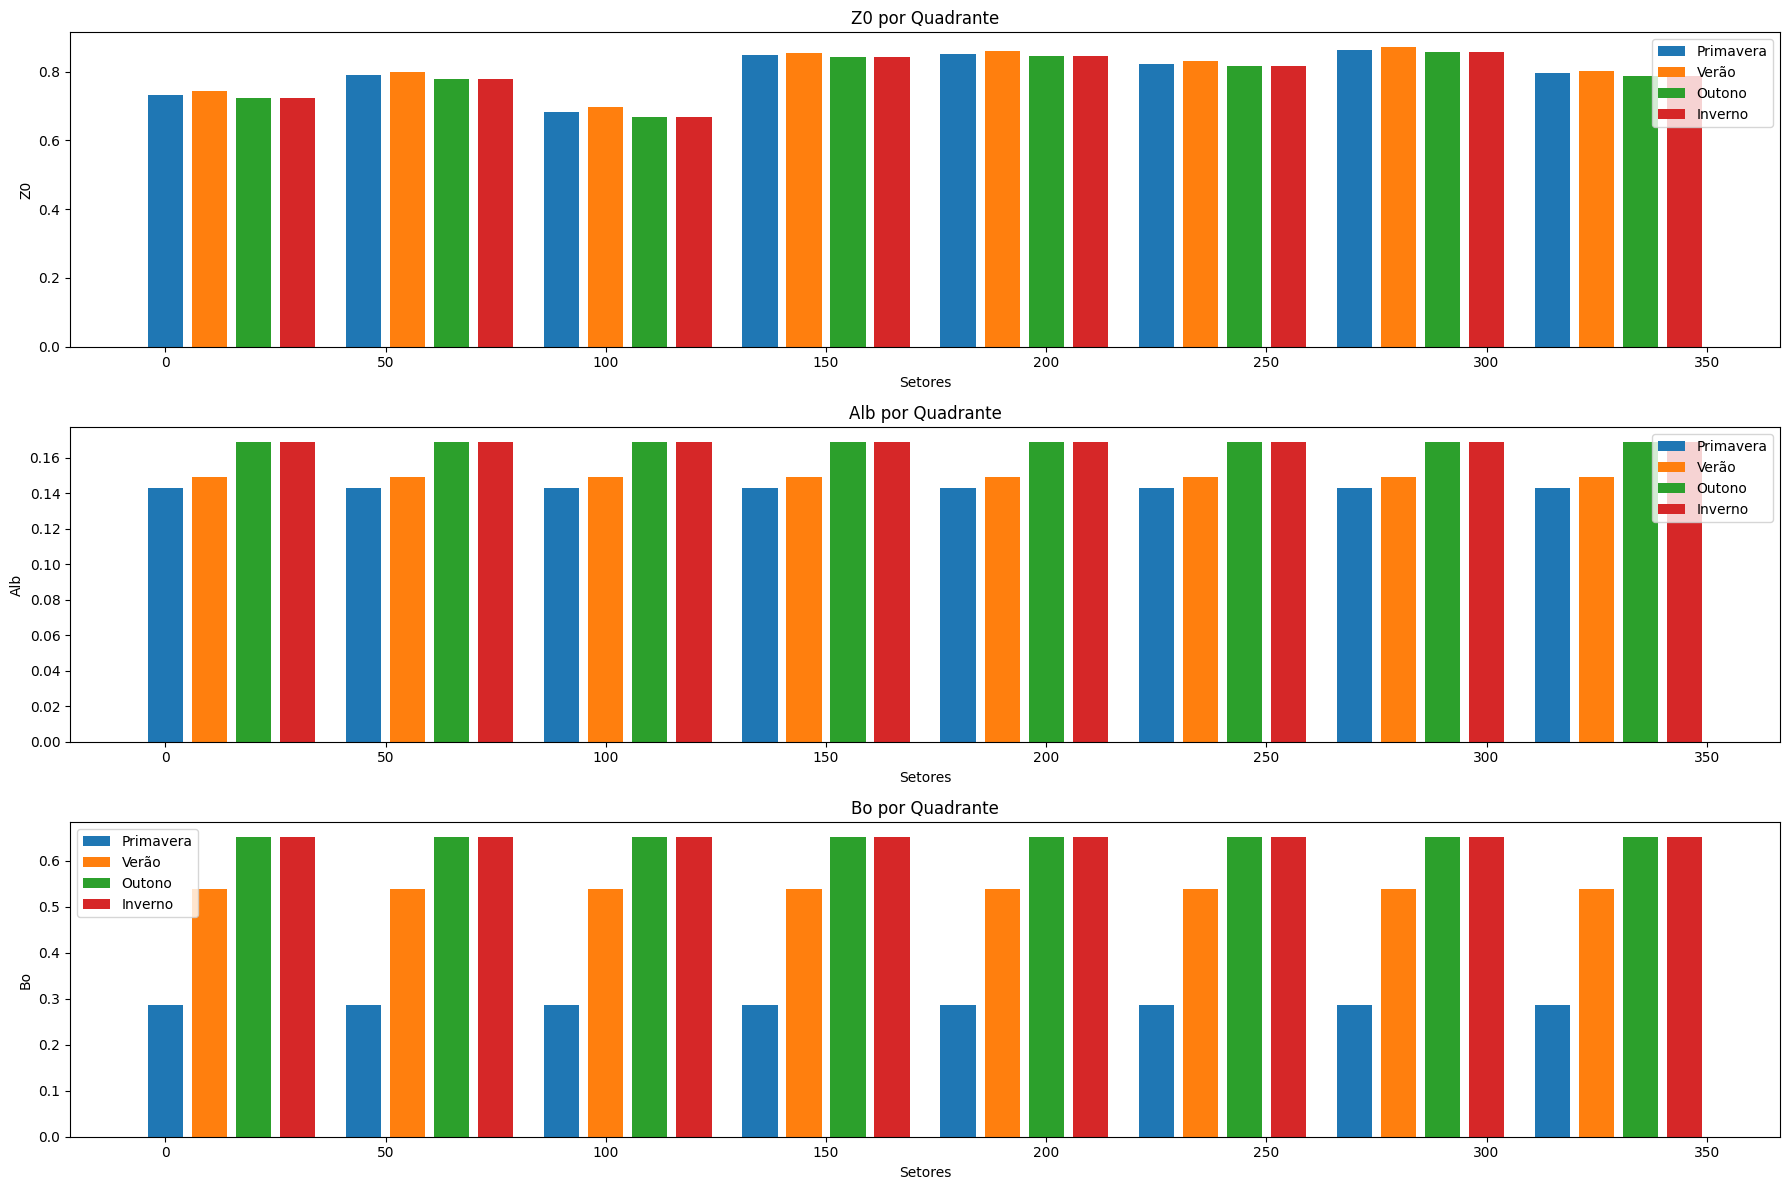

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados da tabela
data = {
    'z0_primavera': [0.682930689, 0.84725276, 0.852429662, 0.822493034, 0.863255208, 0.795671315, 0.789985946, 0.731397534],
    'z0_verão': [0.696549322, 0.855292088, 0.860027967, 0.831259315, 0.870452303, 0.802882666, 0.798923418, 0.74276535],
    'z0_outono': [0.666508818, 0.840821297, 0.846351018, 0.81548001, 0.857497533, 0.785688111, 0.777733396, 0.722303282],
    'z0_inverno': [0.666508818, 0.840821297, 0.846351018, 0.81548001, 0.857497533, 0.785688111, 0.777733396, 0.722303282],
    'alb_primavera': [0.143049805, 0.143049805, 0.143049805, 0.143049805, 0.143049805, 0.143049805, 0.143049805, 0.143049805],
    'alb_verão': [0.149046051, 0.149046051, 0.149046051, 0.149046051, 0.149046051, 0.149046051, 0.149046051, 0.149046051],
    'alb_outono': [0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236],
    'alb_inverno': [0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236],
    'bo_primavera': [0.285324816, 0.285324816, 0.285324816, 0.285324816, 0.285324816, 0.285324816, 0.285324816, 0.285324816],
    'bo_verão': [0.538156927, 0.538156927, 0.538156927, 0.538156927, 0.538156927, 0.538156927, 0.538156927, 0.538156927],
    'bo_outono': [0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187],
    'bo_inverno': [0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187],
    'Sectores': [90, 135, 180, 225, 270, 315, 45, 0]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Preparando os dados para o gráfico
estacoes = ['primavera', 'verão', 'outono', 'inverno']
variables = ['z0', 'alb', 'bo']

plt.figure(figsize=(18, 12))

for i, var in enumerate(variables):
    plt.subplot(3, 1, i+1)
    for estacao in estacoes:
        col_name = f"{var}_{estacao}"
        plt.bar(df['Sectores'] + estacoes.index(estacao)*10, df[col_name], width=8, label=estacao.capitalize())

    plt.title(f'{var.capitalize()} por Quadrante')
    plt.xlabel('Setores')
    plt.ylabel(f'{var.capitalize()}')
    plt.legend()

plt.tight_layout()
plt.show()




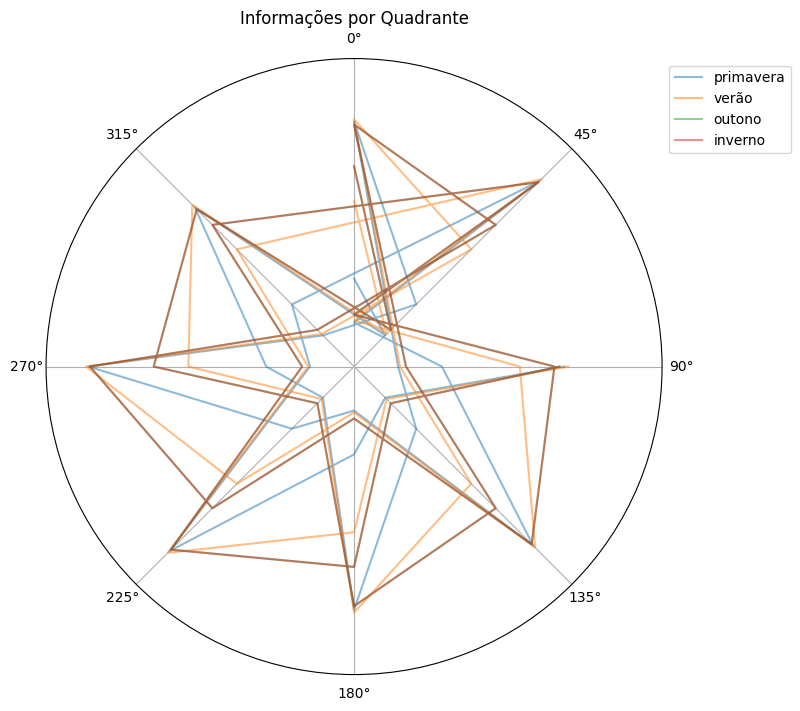

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dados da tabela
data = {
    'z0_primavera': [0.682930689, 0.84725276, 0.852429662, 0.822493034, 0.863255208, 0.795671315, 0.789985946, 0.731397534],
    'z0_verão': [0.696549322, 0.855292088, 0.860027967, 0.831259315, 0.870452303, 0.802882666, 0.798923418, 0.74276535],
    'z0_outono': [0.666508818, 0.840821297, 0.846351018, 0.81548001, 0.857497533, 0.785688111, 0.777733396, 0.722303282],
    'z0_inverno': [0.666508818, 0.840821297, 0.846351018, 0.81548001, 0.857497533, 0.785688111, 0.777733396, 0.722303282],
    'alb_primavera': [0.143049805, 0.143049805, 0.143049805, 0.143049805, 0.143049805, 0.143049805, 0.143049805, 0.143049805],
    'alb_verão': [0.149046051, 0.149046051, 0.149046051, 0.149046051, 0.149046051, 0.149046051, 0.149046051, 0.149046051],
    'alb_outono': [0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236],
    'alb_inverno': [0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236, 0.16862236],
    'bo_primavera': [0.285324816, 0.285324816, 0.285324816, 0.285324816, 0.285324816, 0.285324816, 0.285324816, 0.285324816],
    'bo_verão': [0.538156927, 0.538156927, 0.538156927, 0.538156927, 0.538156927, 0.538156927, 0.538156927, 0.538156927],
    'bo_outono': [0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187],
    'bo_inverno': [0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187, 0.650550187],
    'Sectores': [90, 135, 180, 225, 270, 315, 45, 0]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Cores para cada estação do ano
cores = {
    'primavera': 'tab:blue',
    'verão': 'tab:orange',
    'outono': 'tab:green',
    'inverno': 'tab:red'
}

# Preparando os dados para o gráfico
quadrantes = {
    'primavera': df[['z0_primavera', 'alb_primavera', 'bo_primavera']],
    'verão': df[['z0_verão', 'alb_verão', 'bo_verão']],
    'outono': df[['z0_outono', 'alb_outono', 'bo_outono']],
    'inverno': df[['z0_inverno', 'alb_inverno', 'bo_inverno']]
}

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Repetindo os ângulos para cada variável
theta = np.radians(np.tile(df['Sectores'], 3))

for estacao, dados in quadrantes.items():
    r = np.array(dados).flatten() * 10  # Ajustando a escala para melhor visualização
    ax.plot(theta, r, color=cores[estacao], alpha=0.5)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_ylim(0, 10)  # Limitando o eixo radial para melhor visualização
ax.set_yticks([])   # Removendo as marcações do eixo radial

plt.legend(cores.keys(), loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Informações por Quadrante')
plt.show()
